Name: Luong Nguyen  
Student ID: 1504210  
**Cognitive Systems Mathematics and Methods**  
**Assignment 1: Data manipulation  **
<hr>

# 1.

In [1]:
import pandas as pd
data = pd.Series([5, 2, 7])
print(data)

0    5
1    2
2    7
dtype: int64


# 2.

## construct a `pandas` DataFrame 

In [2]:
data = {'Weight': [92, 70, 58, 99, 55, 76, 62, 92, 71, 70, 77, 79],
        'Exercise': [6, 6, 6, 2, 8, 4, 6, 6, 5, 6, 4, 4],
        'Cholesterol': [4.8, 5.1, 6.4, 6.5, 2.3, 5.7, 4.2, 6.9, 4.8, 4.8, 7.7, 5.7],
        'Income': [2060, 2660, 2530, 1740, 3520, 3750, 2720, 3130, 2100, 3340, 2430, 2700],
        'Happiness': [49, 36, 49, 28, 77, 55, 43, 39, 54, 29, 53, 47],
        'Birthyear': [1953, 1955, 1939, 1942, 1989, 1937, 1979, 1905, 1995, 1966, 1938, 1993]}
df = pd.DataFrame(data)
df.index += 1 
print(df)

    Birthyear  Cholesterol  Exercise  Happiness  Income  Weight
1        1953          4.8         6         49    2060      92
2        1955          5.1         6         36    2660      70
3        1939          6.4         6         49    2530      58
4        1942          6.5         2         28    1740      99
5        1989          2.3         8         77    3520      55
6        1937          5.7         4         55    3750      76
7        1979          4.2         6         43    2720      62
8        1905          6.9         6         39    3130      92
9        1995          4.8         5         54    2100      71
10       1966          4.8         6         29    3340      70
11       1938          7.7         4         53    2430      77
12       1993          5.7         4         47    2700      79


## basics statistics

In [3]:
df.describe()

,Birthyear,Cholesterol,Exercise,Happiness,Income,Weight
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1957.583333,5.408333,5.250000,46.583333,2723.333333,75.083333
std,27.566311,1.419000,1.544786,13.283334,614.807188,13.813421
min,1905.000000,2.300000,2.000000,28.000000,1740.000000,55.000000
25%,1938.750000,4.800000,4.000000,38.250000,2347.500000,68.000000
50%,1954.000000,5.400000,6.000000,48.000000,2680.000000,73.500000
75%,1981.500000,6.425000,6.000000,53.250000,3182.500000,82.250000
max,1995.000000,7.700000,8.000000,77.000000,3750.000000,99.000000


## above / below average income

In [4]:
mean_income = df['Income'].mean()

for index, row in df.iterrows():
    print(f'Person {index}: {"below" if row["Income"] < mean_income else "above"} average income.')

Person 1: below average income.
Person 2: below average income.
Person 3: below average income.
Person 4: below average income.
Person 5: above average income.
Person 6: above average income.
Person 7: below average income.
Person 8: above average income.
Person 9: below average income.
Person 10: above average income.
Person 11: below average income.
Person 12: below average income.


# 3. Chronic kidney disease dataset 

## load data

In [5]:
# upload kd.csv file to google colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kd.csv to kd (1).csv
User uploaded file "kd.csv" with length 43569 bytes


In [6]:
# import data
df = pd.read_csv("kd.csv", na_values=["?"]) # missing values were encoded as '?'
print(df.head().transpose())

                0           1           2           3           4
age            48           7          62          48          51
bp             80          50          80          70          80
sg           1.02        1.02        1.01       1.005        1.01
al              1           4           2           4           2
su              0           0           3           0           0
rbc           NaN         NaN      normal      normal      normal
pc         normal      normal      normal    abnormal      normal
pcc    notpresent  notpresent  notpresent     present  notpresent
ba     notpresent  notpresent  notpresent  notpresent  notpresent
bgr           121         NaN         423         117         106
bu             36          18          53          56          26
sc            1.2         0.8         1.8         3.8         1.4
sod           NaN         NaN         NaN         111         NaN
pot           NaN         NaN         NaN         2.5         NaN
hemo      

## basics statistics


In [7]:
# filter affected patients
affected_df = df[df['class'] == 'ckd']
# basics statistics
affected_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,240.00000,238.000000,207.000000,208.000000,205.000000,210.000000,235.000000,236.000000,166.000000,165.000000,203.000000
mean,54.42500,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217
std,17.41142,15.244756,0.004630,1.375821,1.350788,92.476413,58.722957,6.977209,12.461811,4.347562,2.190174
min,2.00000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.500000,4.500000,2.500000,3.100000
25%,47.00000,70.000000,1.010000,0.000000,0.000000,106.250000,32.000000,1.400000,132.000000,3.800000,9.450000
50%,59.00000,80.000000,1.015000,2.000000,0.000000,143.500000,53.000000,2.250000,136.000000,4.300000,10.900000
75%,66.00000,90.000000,1.015000,3.000000,1.000000,219.750000,93.500000,4.600000,139.000000,4.900000,12.050000
max,90.00000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,16.100000


## correlation matrix

In [8]:
# calculate correlation matrix
correlations = affected_df.corr()
correlations

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.144122,-0.048544,-0.020196,0.204776,0.160216,0.132041,0.079386,-0.026924,0.058805,-0.077130
bp,0.144122,1.000000,0.000183,-0.035352,0.141661,0.046097,0.098726,0.066857,0.020953,0.058271,-0.152156
sg,-0.048544,0.000183,1.000000,-0.015471,-0.084381,-0.078074,-0.079670,-0.134966,0.124610,-0.013684,0.079148
al,-0.020196,-0.035352,-0.015471,1.000000,0.074729,0.135475,0.314705,0.214615,-0.218827,0.094722,-0.299217
su,0.204776,0.141661,-0.084381,0.074729,1.000000,0.677268,0.045245,0.098650,0.096386,0.202059,0.105882
bgr,0.160216,0.046097,-0.078074,0.135475,0.677268,1.000000,-0.031664,-0.052850,-0.081869,0.029192,0.103096
bu,0.132041,0.098726,-0.079670,0.314705,0.045245,-0.031664,1.000000,0.542260,-0.191726,0.368048,-0.568305
sc,0.079386,0.066857,-0.134966,0.214615,0.098650,-0.052850,0.542260,1.000000,-0.679324,0.330104,-0.277334
sod,-0.026924,0.020953,0.124610,-0.218827,0.096386,-0.081869,-0.191726,-0.679324,1.000000,0.185381,0.126338
pot,0.058805,0.058271,-0.013684,0.094722,0.202059,0.029192,0.368048,0.330104,0.185381,1.000000,-0.159433


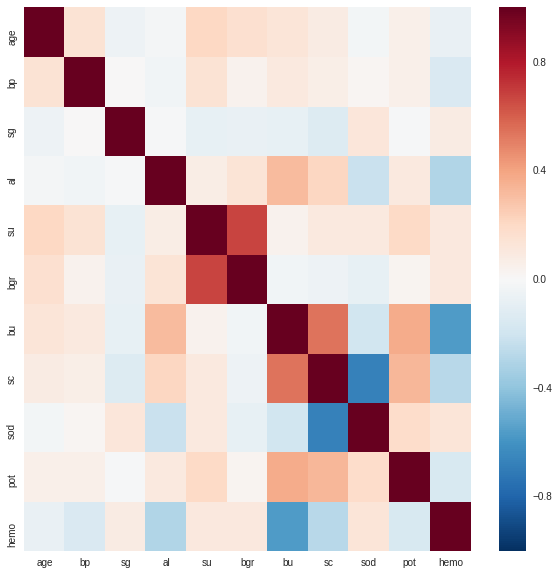

In [9]:
# plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


fig = plt.figure(figsize=(10, 10))
sns.heatmap(correlations, vmin=-1, vmax=1)
plt.show()